<a href="https://colab.research.google.com/github/hrbae/DRB_ML_Training/blob/main/8th_Day/Day8_SamplingBasedInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rejection Sampling**

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
sns.set()

In [ ]:

def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

In [ ]:
x = np.arange(-50, 151)
k = max(p(x) / q(x))

code by https://wiseodd.github.io/techblog/2015/10/21/rejection-sampling/

In [ ]:
def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u=np.random.uniform(0,1)
        if u <= p(z)/(k*q(z)):
            samples.append(z)
    return np.array(samples)

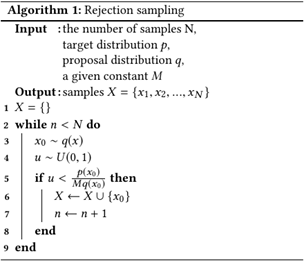

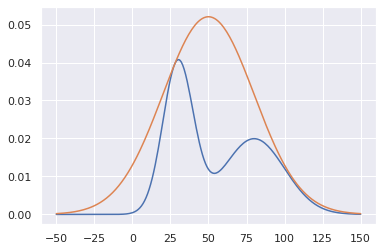

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


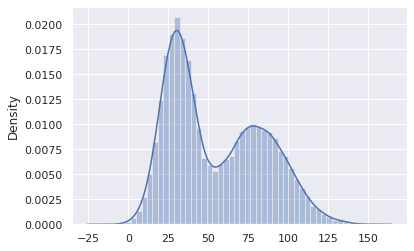

In [ ]:
plt.plot(x, p(x))
plt.plot(x, k*q(x))
plt.show()
s = rejection_sampling(iter=100000)
sns.distplot(s)

Below is importance sampling that calculate the mean of f_x

source: https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744

# **Importance sampling**

In [ ]:
def f_x(x):
    return 1/(1 + np.exp(-x))

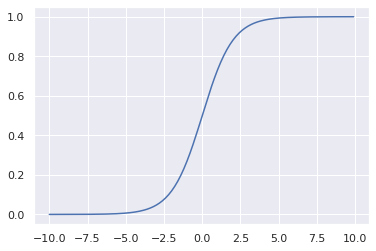

In [ ]:
x=np.arange(-10, 10, 0.1)
plt.plot(x,f_x(x))
plt.show()

In [ ]:
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = st.norm(mu, sigma)
    return distribution
    
# pre-setting
n = 1000

mu_target = 0
sigma_target = 1
mu_appro = 0.5
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)


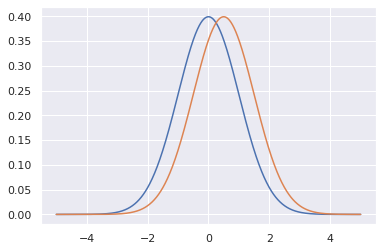

In [ ]:
x=np.linspace(-5, 5, 1000)
plt.plot(x, p_x.pdf(x))
plt.plot(x, q_x.pdf(x))
plt.show()

In [ ]:
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
print("simulate value", s/n)

simulate value 0.5081155930438246


In [ ]:
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

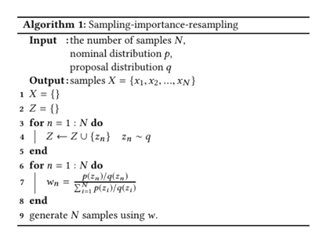

In [ ]:
print(np.average(value_list))

0.49945990850035327


# **Metropolis (MCMC)**

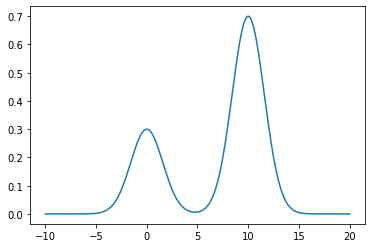

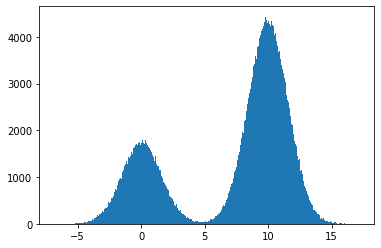

In [ ]:
mu,sig,N = 0,1,1000000
pts = []

def f(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))
    #return 1/(1 + np.exp(-x))
    #return 0.3*np.exp(-0.2*x*x)+0.7*np.exp(-0.2*(x-10)*(x-10))

x=np.linspace(-10, 20, 1000)
plt.plot(x, f(x))
plt.show()    

def metropolis(N):
    r = np.zeros(1)
    p = f(r[0])
    pts = []
    
    for i in range(N):
        rn = r + np.random.uniform(-1,1) # proposed distribution을 유니폼 분포로 사용
        pn = f(rn[0])
        if pn >= p: # Accept or reject
            p = pn
            r = rn
        else: #패자 부활전
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r) # if 구문 안으로 이동?
    
    pts = np.array(pts)
    return pts
    
def hist_plot(array):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,)
    ax.hist(array, bins=1000)    
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')


hist_plot(metropolis(N))

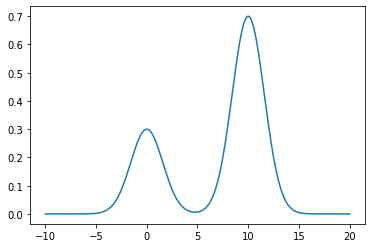

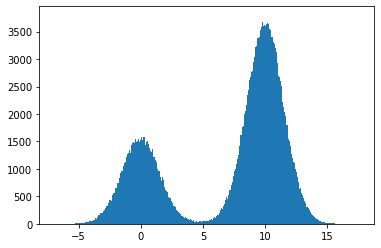

In [ ]:
# by Gaussian distribution as proposed distribution
mu,sig,N = 0,1,1000000
pts = []

def f(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))
    #return 1/(1 + np.exp(-x))
    #return 0.3*np.exp(-0.2*x*x)+0.7*np.exp(-0.2*(x-10)*(x-10))

x=np.linspace(-10, 20, 1000)
plt.plot(x, f(x))
plt.show()    

def metropolis(N):
    r = np.zeros(1)
    p = f(r[0])
    pts = []
    
    for i in range(N):
        #rn = r + np.random.uniform(-1,1)
        rn = np.random.normal(r, sig, 1)
        pn = f(rn[0])
        if pn >= p: # Accept or reject
            pts.append(r)
            p = pn
            r = rn
        else: #패자 부활전
            u = np.random.rand()
            if u < pn/p:
                pts.append(r)
                p = pn
                r = rn
#        pts.append(r)
    
    pts = np.array(pts)
    return pts
    
def hist_plot(array):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,)
    ax.hist(array, bins=1000)    
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')


hist_plot(metropolis(N))